# Данный файл содержит алгоритм предобработки Global DataFrame - датафрейма, необходимого для построения модели

## Первичная очистка и объединение

In [ ]:
import pandas as pd

In [ ]:
df_items = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Global/Sales.tsv', delimiter = "\t")
df_items.head()

In [ ]:
df_items.dropna(subset=['Link'], inplace=True)
df_items.reset_index(inplace=True)
df_items.drop('index', axis=1, inplace = True)
df_items.isna().sum()

In [ ]:
df_items.head()

In [ ]:
import re

def Sales_Value(value):
  pattern = r'\$|,'
  clean_value = re.sub(pattern, '', value)
  numeric_value = float(clean_value)
  return numeric_value


df_items.Price = df_items.Price.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Shipping_cost = df_items.Shipping_cost.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Sales_Count = df_items.Sales_Count.apply(lambda x: float(re.sub(",", "", x)))
df_items.Sales_Value = df_items.Sales_Value.apply(lambda x: Sales_Value(x))

In [ ]:
df_items.head()

In [ ]:
brands_list = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Oppo', 'OnePlus', 'Google', 'Motorola', 'Sony', 'LG', 'HTC', 'Nokia', 'BlackBerry', 'Lenovo', 'Asus', 'ZTE', 'Alcatel', 'Vivo', 'Realme', 'Honor']
brands_regex = re.compile('('+ '|'.join(brands_list) + ')', flags=re.IGNORECASE)

df_items['brand'] = df_items['Title'].str.extract(brands_regex)
df_items['brand'] = df_items['brand'].apply(lambda x: x.lower() if type(x) == str else x)
df_items.head()

In [ ]:
characteristics_df = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Global/Characteristics.tsv", delimiter = "\t")

In [ ]:
cols = list(characteristics_df.count()[(characteristics_df.count()>(1000))].index)
cols

In [ ]:
characteristics_df = characteristics_df[cols]

In [ ]:
characteristics_df.isna().sum().sort_values()

In [ ]:
merged_df = df_items.merge(characteristics_df, on='Link', how='inner')

In [ ]:
merged_df["Brand"][merged_df["Brand"].isna()] = merged_df["brand"].apply(lambda x: x.title() if type(x)==str else x)

In [ ]:
(~merged_df.isna()).sum()

In [ ]:
merged_df.iloc[182]

In [ ]:
merged_df.drop('brand', axis=1, inplace = True)

In [ ]:
merged_df.to_csv("great_bd.tsv", sep="\t")

In [ ]:
merged_df.shape

## Вторичная предобработка полученных с eBay данных

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Preprocessing/Global/great_bd.tsv', delimiter = '\t')

In [3]:
df.head()

,Unnamed: 0,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,...,Operating System,Model Number,Style,MPN,Connectivity,Features,SIM Card Slot,Memory Card Type,Processor,Color
0,0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...,Very Good - Refurbished,“This iPhone 11 is in Very Good condition and ...,Apple,...,iOS,A2111,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...,Very Good - Refurbished,“This Apple iPhone XR 64GB Factory Unlocked Sm...,Apple,...,iOS,A1984,Smartphone,MRYR2LL/A,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",Apple,...,iOS,A2111 (CDMA + GSM),NaN,"MWLD2LL/A, MWL72LL/A, MWL82LL/A, MWL92LL/A, MW...","4G, Bluetooth, GPS","Face ID, Three-axis gyro, 4K Video Recording, ...",Single SIM,Not Applicable,Hexa Core,NaN
3,3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",Apple,...,iOS,A1901,Smartphone,MQA62LL/A,"2G, 3G, 4G, Bluetooth, GPS, LTE, Wi-Fi","4K Video Recording, Bluetooth Enabled, Email, ...",Single SIM,NaN,Hexa Core,NaN
4,4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...,Very Good - Refurbished,"“This is a B+ Stock item, meaning unit is in v...",Apple,...,iOS,A1901,Smartphone,"MQAN2LL/A, MQAM2LL/A","4G, Bluetooth, GPS","4K Video Recording, Bluetooth Enabled",Single SIM,NaN,Hexa Core,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'Title', 'Price', 'Shipping_cost', 'Sales_Count',
       'Sales_Value', 'Link', 'Condition', 'Seller Notes', 'Brand', 'Model',
       'Storage Capacity', 'Network', 'Camera Resolution', 'Screen Size',
       'Lock Status', 'RAM', 'Contract', 'Operating System', 'Model Number',
       'Style', 'MPN', 'Connectivity', 'Features', 'SIM Card Slot',
       'Memory Card Type', 'Processor', 'Color'],
      dtype='object')

In [5]:
df.drop(columns = 'Unnamed: 0', inplace = True)

<Axes: >

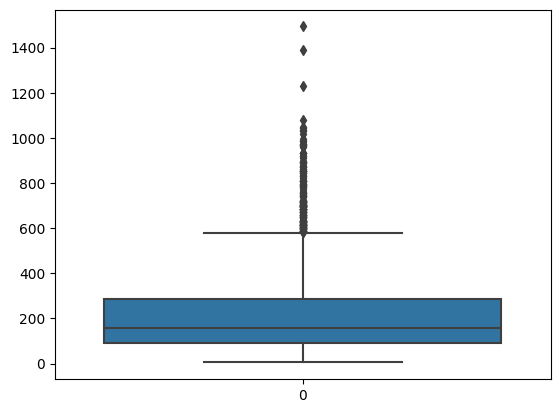

In [6]:
import seaborn as sns
sns.boxplot(df.Price)

In [7]:
import numpy as np
df[df.Price > np.quantile(df.Price, 0.99)]

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,Operating System,Model Number,Style,MPN,Connectivity,Features,SIM Card Slot,Memory Card Type,Processor,Color
384,Apple iPhone 14 Pro Max 128GB Space Black - (U...,1045.48,0.00,355.0,371146.00,https://www.ebay.com/itm/134281877123?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 14 Pro Max,...,iOS,NaN,Bar,MQ8N3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Black
672,Apple iPhone 14 Pro 128GB Space Black - (Unloc...,933.62,0.00,234.0,218467.14,https://www.ebay.com/itm/364016785976?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 14 Pro,...,iOS,NaN,Bar,MPXT3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Black
719,Apple iPhone 12 Pro Max 5G 128GB Graphite - (V...,918.07,0.00,234.0,214829.32,https://www.ebay.com/itm/363276125904?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 12 Pro Max,...,iOS,NaN,Bar,MG9A3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Gray
762,Apple iPhone 12 Pro Max 5G 256GB Graphite - (V...,970.09,0.00,236.0,228940.53,https://www.ebay.com/itm/363276131710?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 12 Pro Max,...,iOS,NaN,Bar,NaN,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Gray
918,"SAMSUNG Galaxy S23, S23+, S23Ultra 5G Unlocked...",1229.73,11.58,159.0,195526.91,https://www.ebay.com/itm/354557412430?nordt=tr...,"New: A brand-new, unused, unopened, undamaged ...",NaN,Samsung,Samsung Galaxy S23 / S23+ / S23 Ultra 5G,...,Android,NaN,Smartphone,"SM-S918N, SM-S916N, SM-S911N",5G,IP68,NaN,NaN,NaN,NaN
930,Apple iPhone 13 Pro Max 5G 128GB Sierra Blue -...,996.42,0.00,230.0,229175.70,https://www.ebay.com/itm/363687011705?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 13 Pro Max,...,iOS,NaN,Bar,MLKP3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Blue
1034,Apple iPhone 13 Pro Max 5G 256GB Graphite MLKR...,1036.79,0.00,225.0,233277.96,https://www.ebay.com/itm/363667334620?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 13 Pro Max,...,iOS,NaN,Bar,MLKR3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Gray
1113,Samsung Galaxy Z Fold 4 F936U1 512GB (Factory ...,958.24,27.06,126.0,120738.74,https://www.ebay.com/itm/325405959604?nordt=tr...,Open box,“The device will be in excellent condition. Sc...,Samsung,Samsung Galaxy Z Fold4,...,Android,SM-F936U1,Foldable,"SM-F936UZKEXAA, SM-F936UZKFXAA",5G,Dual Screen,Single SIM,NaN,Octa Core,NaN
1185,Apple iPhone 13 Pro Max 256GB Gold - (Verizon)...,1015.97,0.00,145.0,147315.00,https://www.ebay.com/itm/144475670475?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 13 Pro Max,...,iOS,NaN,Bar,MLKU3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Gold
1255,Apple iPhone 13 Pro Max 5G 256GB Sierra Blue -...,984.53,0.00,122.0,120113.00,https://www.ebay.com/itm/363660360454?nordt=tr...,Open box,“The item in this listing is an Open Box (pack...,Apple,Apple iPhone 13 Pro Max,...,iOS,NaN,Bar,MLKV3LL/A,"5G, Bluetooth, Wi-Fi, Lightning, NFC","Proximity Sensor, E-compass, Gyro Sensor, Acce...",NaN,NaN,Hexa Core,Blue


In [8]:
df.Condition.value_counts()

Used                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        886
New: A brand-new, unused, unopened, undamaged item in its original packaging (where packaging is ...Read moreabout the conditionNew: A brand-new, unused, unopened, undamaged item in its original packaging (where packaging is applicable). Packaging should be the same as what is found in a retail store, unless the item is handmade or was packaged by the manufacturer in non-retail packaging, such as an unprinted box or plastic bag. See the seller's listin

In [9]:
df['Condition'] = df['Condition'].str.split(':', n=1).str[0]

In [10]:
df.Condition.value_counts()

Used                        1000
New                          689
Open box                     499
Good - Refurbished           381
Very Good - Refurbished      297
Excellent - Refurbished      172
For parts or not working      26
Certified - Refurbished       17
Name: Condition, dtype: int64

In [11]:
df.Brand.value_counts().index

Index(['Samsung', 'Apple', 'LG', 'Google', 'Motorola', 'Samsung Electronics',
       'UMIDIGI', 'Unbranded', 'CAT', 'Kyocera', 'BlackBerry', 'Sonim', 'TCL',
       'BLU', 'DOOGEE', 'Nokia', 'Xiaomi', 'OnePlus', 'XGODY', 'T-Mobile',
       'Alcatel', 'AGM', 'Unihertz', 'ZTE', 'Tracfone', 'Microsoft', 'Palm',
       'OUKITEL', 'Blackview', 'Lively', 'HTC', 'Huawei', 'Verizon Wireless',
       'Lg', 'GOOGLE', 'Ulefone', 'Sony', 'MOTOROLA', 'TracFone',
       'Total By Verizon', 'Verizon', 'Visible', 'APPLE', 'oneplus',
       'Simple Mobile', 'Cricket', 'AT&T', 'Gotake', 'SOYES', 'Maxwest',
       'ASUS', 'Melrose', 'Sky Devices', 'Orbic', 'invisibleSHIELD',
       'Boost Mobile', 'UMX', 'Lanchaung', 'Cellution', 'Cubot', 'mophie',
       'M12', 'Consumer Priority Services', 'SAMSUNG', 'Honor', 'Schok',
       'UMIDGI', 'Satrend', 'Amazon', 'ULEFONE', 'NUU', 'no brand',
       'Wingtech Technology', 'UScellular', 'WingTech', 'Essential', 'OPPO'],
      dtype='object')

In [13]:
df['Brand'] = df['Brand'].str.lower()

In [14]:
df.loc[df['Brand'] == 'samsung electronics', 'Brand'] = 'samsung'

In [15]:
df.Brand.value_counts().index

Index(['samsung', 'apple', 'lg', 'google', 'motorola', 'umidigi', 'unbranded',
       'cat', 'kyocera', 'blackberry', 'sonim', 'blu', 'tcl', 'doogee',
       'oneplus', 'nokia', 'xgody', 'xiaomi', 'alcatel', 't-mobile',
       'tracfone', 'agm', 'unihertz', 'zte', 'palm', 'microsoft', 'oukitel',
       'lively', 'htc', 'ulefone', 'blackview', 'huawei', 'verizon wireless',
       'total by verizon', 'sony', 'verizon', 'visible', 'cricket', 'at&t',
       'simple mobile', 'soyes', 'melrose', 'asus', 'sky devices', 'maxwest',
       'gotake', 'lanchaung', 'cellution', 'boost mobile', 'invisibleshield',
       'cubot', 'mophie', 'm12', 'consumer priority services', 'schok', 'umx',
       'satrend', 'amazon', 'nuu', 'uscellular', 'wingtech', 'essential',
       'umidgi', 'orbic', 'wingtech technology', 'no brand', 'honor', 'oppo'],
      dtype='object')

In [16]:
df['Model'].value_counts().index

Index(['Apple iPhone 11', 'Apple iPhone 8', 'Apple iPhone X',
       'Apple iPhone XR', 'Samsung Galaxy S7', 'Apple iPhone 11 Pro',
       'Samsung Galaxy S10+', 'Samsung Galaxy S9+', 'Samsung Galaxy S9',
       'Apple iPhone 12',
       ...
       'SAMSUNG GALAXY A136U', 'BlackBerry Curve 9360', 'S96 GT',
       'BlackBerry Curve 9380', '13 pro', 'Samsung Galaxy Note 3',
       'Kyocera DuraXV Extreme', 'Razr 5G', 'PH-1', 'S5 Active G870A 16GB'],
      dtype='object', length=710)

In [297]:
df.Connectivity.value_counts()

Bluetooth, 4G, Wi-Fi, Lightning, NFC                                 122
4G, Bluetooth, GPS                                                    95
5G, Bluetooth, Wi-Fi, Lightning, NFC                                  91
5G                                                                    77
4G, Bluetooth, GPS, LTE                                               64
                                                                    ... 
3G, 4G, GPS, LTE, NFC, Wi-Fi                                           1
USB, 2G, 3G, 4G, Bluetooth, Dual-Band, GPS, Lightning, NFC, Wi-Fi      1
4G, 3G, 2G, GPS                                                        1
4G, GPS, LTE, Wi-Fi                                                    1
2G, 3G, 4G, Bluetooth, Wi-Fi, USB Type-C                               1
Name: Connectivity, Length: 508, dtype: int64

In [298]:
Features = df['Connectivity'].str.get_dummies(', ')

In [299]:
Features

,"""3G""","""4G""","""Bluetooth""","""GPS""]",2G,3G,4G,4G Bluetooth GPS LTE,4G LTE,4G+,...,WCDMA,WI-FI,WIFI,WIFI: 2.4G/5G,Wi-Fi,WiFi,Wifi,Wireless charging,"[""2G""",microUSB 2.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
Features.columns

Index(['"3G"', '"4G"', '"Bluetooth"', '"GPS"]', '2G', '3G', '4G',
       '4G Bluetooth GPS LTE', '4G LTE', '4G+',
       '4G+,5G,Bluetooth,GPS,LTE,NFC,USB Type-C,Wi-Fi',
       '4G,Bluetooth,GPS,Lightning,LTE,NFC,Wi-Fi', '4G,LTE', '5G',
       '5G (A32 5G Models ONLY)', '5G (Galaxy A51 5G Only)',
       '5G (Pixel 4A 5G Only)', '5G (Pixel 4a 5G ONLY)', '5G Bluetooth GPS',
       '5G+', '5g capable', 'ANT+', 'Android Beam', 'Beidou', 'Bluetooth',
       'Cellular', 'DLNA', 'Dual-Band', 'EDGE', 'FM', 'Fast Charge', 'GPRS',
       'GPS', 'GSM', 'GSM Unlocked', 'Galileo', 'Global Version', 'Glonass',
       'HDMI Micro', 'Headphone Jack', 'Infrared', 'LTE', 'Lightning',
       'Micro USB', 'Micro USB 2.0', 'NFC', 'OTA', 'OTG', 'Quad-Band',
       'Tri-Band', 'Type-C', 'Type-C port', 'USB', 'USB 2.0', 'USB 3.1',
       'USB Type-C', 'USB Type-C 3.1', 'USB Type-C,5G,Bluetooth,Wi-Fi,NFC',
       'USB Type-C,Bluetooth,Wi-Fi,NFC', 'WAP', 'WCDMA', 'WI-FI', 'WIFI',
       'WIFI: 2.4G/5G', 'Wi-Fi'

In [301]:
#идея в том, что блютуз, wifi и 3g ессть практически во всех телефонах, поэтому выделять их в отдельную колонку не имеет смысла
Features['4G'] = Features['4G'] + Features['"4G"'] + Features['4G Bluetooth GPS LTE'] + Features['4G LTE'] + Features['4G+'] + Features['4G+,5G,Bluetooth,GPS,LTE,NFC,USB Type-C,Wi-Fi'] + Features['4G,Bluetooth,GPS,Lightning,LTE,NFC,Wi-Fi'] + Features['4G,LTE'] + Features['LTE']
Features['5G'] = Features['5G'] + Features['5G (A32 5G Models ONLY)'] + Features['5G (Galaxy A51 5G Only)'] + Features['5G (Pixel 4A 5G Only)'] + Features['5G (Pixel 4a 5G ONLY)'] + Features['5G Bluetooth GPS'] + Features['5G+'] + Features['5g capable'] + Features['USB Type-C,5G,Bluetooth,Wi-Fi,NFC']
Features['Type-c'] = Features['Type-C'] + Features['Type-C port'] + Features['USB Type-C'] + Features['USB Type-C 3.1'] + Features['USB Type-C,5G,Bluetooth,Wi-Fi,NFC'] + Features['USB Type-C,Bluetooth,Wi-Fi,NFC']
Features['Fast_usb'] = Features['USB Type-C 3.1'] + Features['USB 3.1']
Features['NFC'] = Features['NFC'] + Features['USB Type-C,5G,Bluetooth,Wi-Fi,NFC'] + Features['4G+,5G,Bluetooth,GPS,LTE,NFC,USB Type-C,Wi-Fi'] + Features['4G,Bluetooth,GPS,Lightning,LTE,NFC,Wi-Fi']

In [302]:
Reasonable = Features[['4G', '5G', 'Type-c', 'Fast_usb', 'NFC', 'Dual-Band', 'FM', 'Global Version', 'HDMI Micro',
                       'Headphone Jack', 'Infrared', 'Lightning', 'Quad-Band', 'Tri-Band', 'Wireless charging']]

In [303]:
Reasonable.loc[Reasonable.values > 1] = 1

C:\Users\Luka\AppData\Local\Temp\ipykernel_724\2077285632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reasonable.loc[Reasonable.values > 1] = 1


In [304]:
(Reasonable.values > 1).sum()

0

In [305]:
df['Storage Capacity'].value_counts()
#убираем везде гиги за шаги а дальше развлекаемся

128 GB           645
64 GB            588
32 GB            273
256 GB           176
16 GB            162
                ... 
128GB 256GB        1
64 / 128 GB        1
256 GB, 512GB      1
64GB, 128GB        1
64 GB 256GB        1
Name: Storage Capacity, Length: 122, dtype: int64

In [306]:
df['Storage Capacity'] = df['Storage Capacity'].str.extract(r'(\d+)')
df['Storage Capacity'] = pd.to_numeric(df['Storage Capacity'])

In [307]:
df['Storage Capacity'].value_counts()

128.0    817
64.0     764
32.0     350
256.0    274
16.0     205
512.0     60
8.0       53
4.0       27
1.0        9
2.0        3
23.0       1
440.0      1
12.0       1
Name: Storage Capacity, dtype: int64

In [308]:
df.columns

Index(['Title', 'Price', 'Shipping_cost', 'Sales_Count', 'Sales_Value', 'Link',
       'Condition', 'Seller Notes', 'Brand', 'Model', 'Storage Capacity',
       'Network', 'Camera Resolution', 'Screen Size', 'Lock Status', 'RAM',
       'Contract', 'Operating System', 'Model Number', 'Style', 'MPN',
       'Connectivity', 'Features', 'SIM Card Slot', 'Memory Card Type',
       'Processor', 'Color'],
      dtype='object')

In [309]:
#тут есть операторские и не операторские телефоны. сразу разделим их и не будем работать с конкретными операторами
df['Network'].value_counts()

Unlocked                                                                                                                                                    1163
Verizon                                                                                                                                                      257
Factory Unlocked                                                                                                                                             118
T-Mobile                                                                                                                                                     115
AT&T                                                                                                                                                          93
                                                                                                                                                            ... 
AT&T, T-Mobile, Most GSM Netwowks 

In [310]:
df.loc[df['Network'] != 'Unlocked', 'Network'] = 'Operator'

In [311]:
df['Network'].value_counts()

Operator    1918
Unlocked    1163
Name: Network, dtype: int64

In [312]:
#в камере есть наблюдения с тройными четверными и т.д. камерами, но мы просто вырезаем мегапиксели оттуда :D
df['Camera Resolution'].value_counts()

12.0 MP                       951
12.0MP                        202
16.0 MP                       156
8.0 MP                        109
13.0 MP                       107
                             ... 
Triple 48 MP + 8 MP + 5 MP      1
8.0 MP, 16.0MP, 48.0 MP         1
108 MP                          1
50 MP                           1
32 megapixels                   1
Name: Camera Resolution, Length: 157, dtype: int64

In [313]:
df['Camera Resolution'] = df['Camera Resolution'].str.extract(r'(\d+)')
df['Camera Resolution'] = pd.to_numeric(df['Camera Resolution'])

In [314]:
#в камере есть наблюдения с тройными четверными и т.д. камерами, но мы просто вырезаем мегапиксели оттуда :D
df['Camera Resolution'].value_counts()

12.0      1429
16.0       292
8.0        146
48.0       134
13.0       130
5.0         93
64.0        92
108.0       60
50.0        42
2.0         19
32.0        15
24.0        13
25.0        11
750.0        9
3200.0       9
20.0         9
40.0         8
100.0        7
21.0         7
3.0          6
11.0         6
1.0          4
10.0         3
1334.0       3
0.0          3
7.0          2
72.0         2
14.0         1
6.0          1
1080.0       1
200.0        1
19.0         1
41.0         1
Name: Camera Resolution, dtype: int64

In [315]:
df.loc[df['Camera Resolution'] > 100, 'Camera Resolution'] = 32

In [316]:
#все одно и то же, достаем оттуда все-все-все
df['Screen Size'].value_counts()

6.1 in                               294
5.8 in                               257
6.5 in                               182
4.7 in                               157
6.4 in                               128
                                    ... 
6.517 in                               1
Pixel 3 5.5 in, Pixel 3 XL 6.3 In      1
6.82 in                                1
6.52"                                  1
6.78''                                 1
Name: Screen Size, Length: 149, dtype: int64

In [317]:
df['Screen Size'] = df['Screen Size'].str.extract(r'(\d+\.\d+)')
df['Screen Size'] = pd.to_numeric(df['Screen Size'])

In [318]:
#все одно и то же, достаем оттуда все-все-все
df['Screen Size'].value_counts()

6.10    339
5.80    309
4.70    216
6.50    193
5.50    153
       ... 
4.95      1
3.70      1
3.22      1
7.00      1
6.78      1
Name: Screen Size, Length: 70, dtype: int64

In [319]:
#все то же самое с оперативкой
df['RAM'].value_counts()

4 GB                                      612
6 GB                                      321
2 GB                                      310
8 GB                                      279
3 GB                                      268
12 GB                                     118
4GB                                        80
3GB                                        50
2GB                                        49
1 GB                                       43
12GB                                       41
8GB                                        41
16 GB                                      15
6GB                                        14
1.5GB                                      12
4GB/6GB                                    10
1.5 GB                                      8
4GB/8GB                                     7
512 MB                                      6
8GB, 12GB, 16GB                             5
512MB                                       5
1GB                               

In [320]:
df['RAM'] = df['RAM'].str.extract(r'(\d+)')
df['RAM'] = pd.to_numeric(df['RAM'])

In [321]:
#все то же самое с оперативкой
df['RAM'].value_counts()

4.0      715
2.0      360
6.0      340
8.0      329
3.0      321
12.0     159
1.0       71
16.0      15
512.0     12
32.0       3
256.0      3
768.0      3
51.0       1
0.0        1
128.0      1
64.0       1
Name: RAM, dtype: int64

In [322]:
df.loc[df['RAM'] > 16, 'RAM'] = 8

In [323]:
df.Contract.value_counts()

Without Contract                          2172
Prepaid                                     50
unlocked                                    27
With Contract                               26
Google Fi Network                            3
Unlocked                                     2
Sprint Bad ESN NOT for carrier unlock        2
Without Contract AT&T With Unlock Code       2
locked                                       2
Unlocked Smartphone                          1
Locked                                       1
na                                           1
Name: Contract, dtype: int64

In [324]:
df['Operating System'].value_counts()

Android                                             1627
iOS                                                  781
iOS - Apple                                           80
IOS                                                   37
Android 11                                            31
Android 10                                            19
Android 12                                            16
BlackBerry OS                                         11
Android OS                                             9
BlackBerry 3-7                                         9
ANDROID                                                6
KaiOS                                                  6
OxygenOS                                               5
Android OS 12 system                                   5
Android 10.0                                           5
Android 11.0                                           4
Android 9                                              4
Windows Mobile                 

In [325]:
df['Operating System'] = df['Operating System'].str.replace(r'Android\b.*', 'Android')

C:\Users\Luka\AppData\Local\Temp\ipykernel_724\3613456212.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Operating System'] = df['Operating System'].str.replace(r'Android\b.*', 'Android')


In [326]:
df.loc[(df['Operating System'] == 'iOS') | (df['Operating System'] == 'IOS') | (df['Operating System'] == 'iOS - Apple'), 'Operating System'] = 'IOS'

In [327]:
df.loc[(df['Operating System'] != 'IOS') & (df['Operating System'] != 'Android'), 'Operating System'] = 'Other'

In [328]:
df['Operating System'].value_counts()

Android    1733
IOS         898
Other       450
Name: Operating System, dtype: int64

In [329]:
df['Style'].value_counts()

Bar                                                  1692
Smartphone                                            279
Flip                                                   17
Slate                                                  15
Foldable                                               13
Smart Phone                                             6
Rugged                                                  6
Touch Screen                                            6
Outdoor Smartphone Unlocked                             4
Outdoor Handy Rugged Smartphone                         3
Swivel                                                  3
Slider                                                  3
Does not apply                                          2
Outdoor Unlocked Rugged Smartphone                      2
Bar / Smart Phone                                       2
5G Rugged Smartphones                                   1
DOSE NOT APPLY                                          1
Unlocked 5G Ru

In [331]:
df['Features'].value_counts() #юзлесс

Internet Browser, Near Field Communication, Touchscreen, 3G Data Capable, 4G Data Capable, Bluetooth Enabled, Global Ready, GPS, Music Player, Speakerphone, TTY Compatible, Voice-Activated Dialing, Wi-Fi Capable                                                                                            58
4K Video Recording, AMOLED Display                                                                                                                                                                                                                                                                             35
Super Retina Xdr Display, Fast Wireless Charging, Dust-Resistant, OLED Display, Telephoto Lens, Water-Resistant, 4K Video Recording, Facial Recognition, Wide-Angle Camera, Ultra Wide-Angle Camera, HDR Display, eSIM, Fast Charging, Triple Rear Camera                                                      34
Liquid Retina HD Display, Water-Resistant, Facial Recognition, 4K Video Recording,

In [333]:
df['SIM Card Slot'].value_counts() #норм

Single SIM                            1707
Dual SIM                                83
Dual SIM (SIM + SIM)                    71
Dual SIM (SIM + eSIM)                   63
Dual SIM (SIM + SIM + Memory Card)      61
Dual SIM (SIM + SIM/Memory Card)        50
Nano-SIM                                 6
eSIM                                     2
Dual Nano SIM                            1
Name: SIM Card Slot, dtype: int64

In [335]:
#выглядит юзлесс
df['Memory Card Type'].value_counts()

MicroSD                                        930
microSDXC                                      187
Not Applicable                                 131
Built-In Memory                                 88
None                                            65
CompactFlash                                    49
MicroSDHC                                       18
MicroSDXC                                       13
Internal                                        10
MicroSD, MicroSDHC                               9
TransFlash Card                                  8
Not Applicabe                                    8
microSDXC (uses shared SIM slot)                 6
MiniSD                                           5
microSDXC (dedicated slot)                       5
MicroSD, MicroSDHC, MicroSDXC                    5
In-Build                                         5
microSDXC (dedicated slot), 2 GB included        4
microSD, up to 400 GB                            4
TF CARD                        

In [336]:
df['Processor'].value_counts() #тоже юзлесс, т.к.есть много мусорных признаков

Octa Core                                1227
Hexa Core                                 534
Quad Core                                 269
Dual Core                                 116
Octa-core                                  25
                                         ... 
1.5Ghz                                      1
A15 Bionic chip                             1
Qualcomm Snapdragon™ 855 Octa-core          1
Mediatek MT6765 Helio P35 (Octa-Core)       1
Google Tensor G2 (5 nm)                     1
Name: Processor, Length: 70, dtype: int64

In [337]:
data = pd.concat([df, Reasonable], axis = 1)

In [339]:
data.columns

Index(['Title', 'Price', 'Shipping_cost', 'Sales_Count', 'Sales_Value', 'Link',
       'Condition', 'Seller Notes', 'Brand', 'Model', 'Storage Capacity',
       'Network', 'Camera Resolution', 'Screen Size', 'Lock Status', 'RAM',
       'Contract', 'Operating System', 'Model Number', 'Style', 'MPN',
       'Connectivity', 'Features', 'SIM Card Slot', 'Memory Card Type',
       'Processor', 'Color', '4G', '5G', 'Type-c', 'Fast_usb', 'NFC',
       'Dual-Band', 'FM', 'Global Version', 'HDMI Micro', 'Headphone Jack',
       'Infrared', 'Lightning', 'Quad-Band', 'Tri-Band', 'Wireless charging'],
      dtype='object')

In [350]:
data.isna().sum()

Title                   0
Price                   0
Shipping_cost           0
Sales_Count             0
Sales_Value             0
Link                    0
Condition               0
Seller Notes          881
Brand                   8
Model                 170
Storage Capacity      516
Network                 0
Camera Resolution     521
Screen Size           703
Lock Status           756
RAM                   746
Contract              792
Operating System        0
Model Number         1120
Style                1014
MPN                   725
Connectivity          751
Features              865
SIM Card Slot        1037
Memory Card Type     1469
Processor             723
Color                1877
4G                      0
5G                      0
Type-c                  0
Fast_usb                0
NFC                     0
Dual-Band               0
FM                      0
Global Version          0
HDMI Micro              0
Headphone Jack          0
Infrared                0
Lightning   

In [352]:
#чистим наны
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

categorical_cols = data.select_dtypes(include='object').columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [353]:
data.isna().sum()

Title                0
Price                0
Shipping_cost        0
Sales_Count          0
Sales_Value          0
Link                 0
Condition            0
Seller Notes         0
Brand                0
Model                0
Storage Capacity     0
Network              0
Camera Resolution    0
Screen Size          0
Lock Status          0
RAM                  0
Contract             0
Operating System     0
Model Number         0
Style                0
MPN                  0
Connectivity         0
Features             0
SIM Card Slot        0
Memory Card Type     0
Processor            0
Color                0
4G                   0
5G                   0
Type-c               0
Fast_usb             0
NFC                  0
Dual-Band            0
FM                   0
Global Version       0
HDMI Micro           0
Headphone Jack       0
Infrared             0
Lightning            0
Quad-Band            0
Tri-Band             0
Wireless charging    0
dtype: int64

In [ ]:
data.to_csv('preprocessed.tsv', index = False, sep = '\t')